## Introduction

This notebook attempts (key word: <b>attempts</b>) to answer the three inspiration questions listed in the introduction page to the dataset: 

Where are the best cocoa beans grown?<br>
Which countries produce the highest-rated bars?<br>
What’s the relationship between cocoa solids percentage and rating?

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Taking a look at the first few rows of the dataframe, it appears that there might be a few entries that are missing the bean type. I'll look into more detail below.

In [2]:
chocdf = pd.read_csv('../input/flavors_of_cacao.csv')

chocdf.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Columns with multiple words have line breaks in them so let's clean that up. 

In [3]:
chocdf.rename(columns = lambda x: x.replace('\n', ' '), inplace = True)

In [4]:
chocdf.columns

Index(['Company  (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF',
       'Review Date', 'Cocoa Percent', 'Company Location', 'Rating',
       'Bean Type', 'Broad Bean Origin'],
      dtype='object')

Looking at the table information, it looks like there isn't much missing data and the column types appear appropriate for what the column is representing. We saw in the first few rows above that there were missing bean types; they must be empty strings since Pandas does not recognize them as nulls, which is why we're seeing all but one non-null entries in the information below. 

In [5]:
chocdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company  (Maker-if known)           1795 non-null object
Specific Bean Origin or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review Date                         1795 non-null int64
Cocoa Percent                       1795 non-null object
Company Location                    1795 non-null object
Rating                              1795 non-null float64
Bean Type                           1794 non-null object
Broad Bean Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


## Where are the best cocoa beans grown?

Almost half of the bean type entries are empty strings. Not only that, there are different variations of similar bean types. Unfortunately I do not have enough domain knowledge to know if I can combine types that share variations. This is information I wish I knew so I could go deeper into seeing which kinds of beans tend to have higher ratings and where these beans come from.

In [96]:
chocdf['Bean Type'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
Beniano                       3
EET                           3
Matina                        3
Forastero (Catongo)           2
Criollo (Amarru)              2
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Amazon mix                    2
Nacional                      2
Amazon, ICS                   2
Criollo, Forastero            2
Trinitario (85% Criollo)      2
Criollo (Ocumare)             1
Trinitario, TCGA              1
CCN51                         1
Criollo (Ocumare 77)          1
Forastero(Arriba, CCN)        1
Forastero (Arriba) ASSS       1
Trinitar

Also curious if there's a way to fill in the bean types that are empty strings. It doesn't seem we can match one particular bean origin to each bean type. Although I didn't show it, I did the same for company location and also couldn't match one particular country to each bean type. 

In [11]:
chocdf.groupby(['Broad Bean Origin', 'Bean Type']).size()

Broad Bean Origin             Bean Type               
Africa, Carribean, C. Am.                                  1
Australia                                                  3
Belize                        Amazon                       1
                              Criollo                      1
                              Criollo, Trinitario          2
                              Trinitario                  39
                              Trinitario, Criollo          1
                              Trinitario, TCGA             1
                                                           4
Bolivia                       Amazon, ICS                  2
                              Beniano                      3
                              Criollo                      7
                              Criollo (Wild)               1
                              Criollo, Trinitario          2
                              Nacional                     1
                              

## Overview of Cocoa Percent and Ratings

Looking at cocoa percent distribution, chocolate tends to be made up of 60% to 80% of cocoa.

In [25]:
chocdf['Cocoa Percent'] = chocdf['Cocoa Percent'].apply(lambda x: float(x.strip('%')))

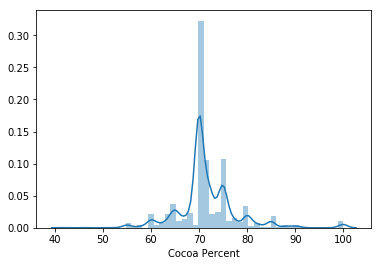

In [28]:
sns.distplot(chocdf['Cocoa Percent'])

A significant amount of the ratings are in the 3 to 4 range. According to the data introduction page, the rating system is as follows:

5 = Elite (Transcending beyond the ordinary limits)<br>
4 = Premium (Superior flavor development, character and style)<br>
3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)<br>
2 = Disappointing (Passable but contains at least one significant flaw)<br>
1 = Unpleasant (mostly unpalatable)

I was considering adjusting any 1.5 and 1.75 ratings to just a rating of 1, and so forth with ratings 2-5. The rating system above though sounds like 3.0 and 3.75 could be considered as their own rating categories. Regardless, we would still end up with more 3-ratings.

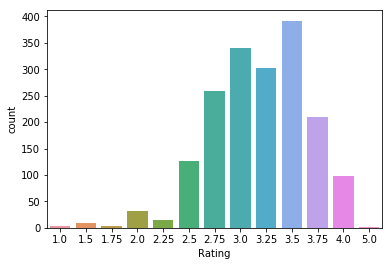

In [9]:
sns.countplot(chocdf['Rating'])

## What’s the relationship between cocoa percentage and rating?

There honestly doesn't seem to be a strong relationship between the amount of cocoa in the chocolate and its rating; different cocoa amounts do not seem to affect ratings in a particular direction

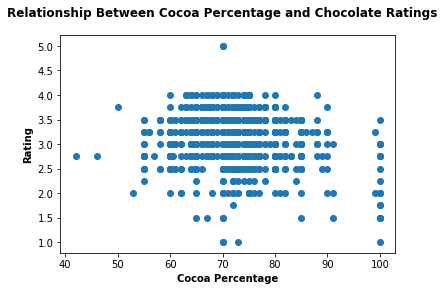

In [43]:
fig = plt.figure()
fig.suptitle('Relationship Between Cocoa Percentage and Chocolate Ratings', fontweight = 'bold')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Cocoa Percentage', fontweight = 'bold')
ax.set_ylabel('Rating', fontweight = 'bold')
plt.scatter(chocdf['Cocoa Percent'], chocdf['Rating'])

## Which countries produce the highest-rated bars?

I filtered down the data to include company locations that had more than 25 entries and compared the median ratings for each country. After doing so, Austrailia, USA, Switzerland, Italy, and Germany are among countries with highest median chocolate bar ratings. 

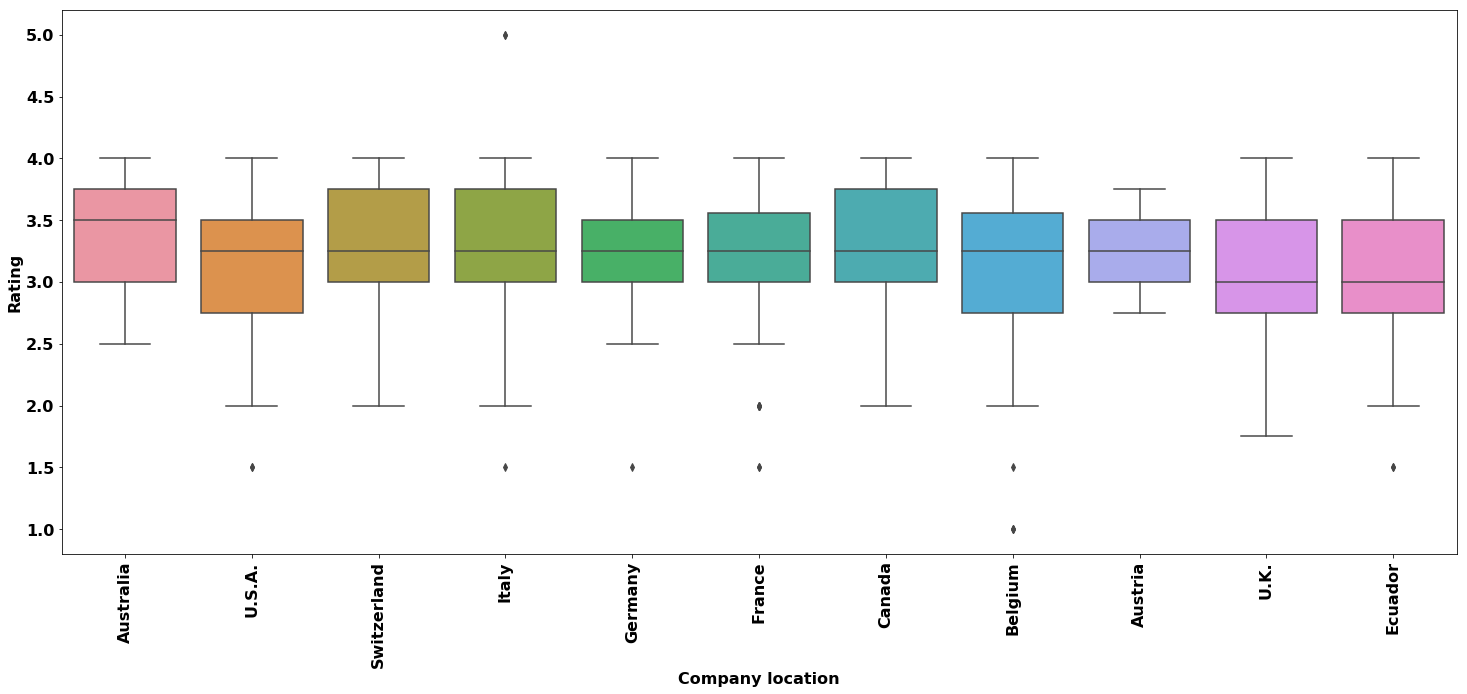

In [95]:
countrydf = chocdf.groupby('Company Location').filter(lambda x: len(x) > 25)
df2 = pd.DataFrame({col:vals['Rating'] for col,vals in countrydf.groupby('Company Location')})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)

fig2 = plt.figure(figsize = (25, 10))
ax2 = fig2.add_subplot(111)
sns.boxplot(x='Company Location',y='Rating', data=countrydf, order=meds.index, ax = ax2)
plt.xticks(rotation = 90)
ax2.set_xlabel('Company location', fontdict = {'weight': 'bold', 'size': 16})
ax2.set_ylabel('Rating', fontdict = {'weight': 'bold', 'size': 16})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")